# Intro to Regression

by [Evan Gonzalez](https://www.linkedin.com/in/evan-gonzalez)

>[Intro to Regression](#scrollTo=slI_gGwhHzn9)

>[Code of Conduct](#scrollTo=LrRP6uvB4x-Q)

>[Goals](#scrollTo=V7k_q8f9BSJh)

>>[Disclaimer](#scrollTo=V7k_q8f9BSJh)

>[What is Machine Learning?](#scrollTo=BCFRILX7P78q)

>>[Datasets](#scrollTo=BCFRILX7P78q)

>>[Supervised vs. Unsupervised Learning](#scrollTo=BCFRILX7P78q)

>>>[Supervised Learning](#scrollTo=BCFRILX7P78q)

>>>[Unsupervised Learning](#scrollTo=BCFRILX7P78q)

>[Linear Regression](#scrollTo=ABkec7iekRN-)

>>[Least squares linear regression](#scrollTo=ABkec7iekRN-)

>>[Iris dataset](#scrollTo=XYzLrd3Q6Lw6)

>>>[Splitting your data](#scrollTo=YUq4H_GG5mCd)

>>[Diabetes dataset](#scrollTo=h4fFAdL-GvsQ)

>>>[Problem 1](#scrollTo=lzDw0EJfNAQE)

>>[Beyond straight lines](#scrollTo=edk0Ap94z0M3)

>[Logistic Regression](#scrollTo=zGCQLO1wKvvp)

>>[Sigmoid Function](#scrollTo=zGCQLO1wKvvp)

>>[Linear vs. Logistic Regression](#scrollTo=-Of988DpLVyY)

>>[Disadvantages](#scrollTo=-Of988DpLVyY)

>>[Wine dataset](#scrollTo=8DyOCI_ePybx)

>>[Digits datasest](#scrollTo=90UMvnOESN_J)

>>>[Problem 2](#scrollTo=gqJKT1QbavGy)

>[Provide Feedback Here](#scrollTo=furgzzFfIFRD)



#[Code of Conduct](https://docs.google.com/presentation/d/1UiBbQLGCZ_8VTTufJGitjnfz2Lj12TzAPuvHLvRLMhk/edit?usp=drive_link)

# Goals

1.   Understand basic terminology for machine learning
2.   Learning linear and logistic regression models
3.   Use the scikitlearn python package to generate linear and logisitic regression models

## Disclaimer

This is the first time I've ever taught this content. I am not an expert in machine learning. I am not going deep into the math here (for that, check out Andrew Ng's free course on Cousera). I am here to teach you the shortcut through scikitlearn. We will skip a lot of key concepts here so I would think of this as an introduction to machine learning concepts. Seek out other courses!




# What is Machine Learning?

Machine learning is a subfield of artificial intelligence that uses algorithms trained on data sets to create models that enable machines to perform tasks that would otherwise only be possible for humans, such as categorizing images, analyzing data, or predicting price fluctuations.

The basic idea is that we will train a model given data inputs and then use this model to generate prediction outputs:

Inputs -> some algorithm -> outputs

## Datasets

Your data is probably the most important ingredient. If you have bad data, it doesn't matter how good your algorithm is, you'll have bad predictions (garbage in = garbage out). Half of the battle in producing meaningful machine learning predictions is obtaining good (and clean/easy to work with) data. Obtaining these ideal datasets is very time consuming and expensive.

There are tons of public datasets out there. One nice place to find many of them is [datasetlist.com](https://datasetlist.com). Here are a few examples that seemed particularly cool to me:

- **Google Open Buildings**: A dataset of building footprints to support social good applications. The dataset contains 516M building detections, across an area of 19.4M km2 (64% of the African continent).
- **Facebook Casual Conversations**: Casual Conversations dataset is designed to help researchers evaluate their computer vision and audio models for accuracy across a diverse set of age, genders, apparent skin tones and ambient lighting conditions. Casual Conversations is composed of over 45,000 videos (3,011 participants) and intended to be used for assessing the performance of already trained models.
- **IBM CodeNet**: A large dataset aimed at teaching AI to code, it consists of some 14M code samples and about 500M lines of code in more than 55 different programming languages, from modern ones like C++, Java, Python, and Go to legacy languages like COBOL, Pascal, and FORTRAN.
- **ONCE Dataset**: The ONCE dataset is a large-scale autonomous driving dataset with 2D&3D object annotations. Includes 1 Million LiDAR frames, 7 Million camera images.
- **MedICaT**: MedICaT is a dataset of medical images, captions, subfigure-subcaption annotations, and inline textual references. Consists of: 217,060 figures from 131,410 open access papers, 7507 subcaption and subfigure annotations for 2069 compound figures, Inline references for ~25K figures in the ROCO dataset.
- Many many more...

## Supervised vs. Unsupervised Learning

### Supervised Learning

The idea of supervised learning is that the learning system is given inputs and told which specific outputs should be associated with them.

We divide up supervised learning based on whether the outputs are drawn from a small finite set (classification) or a large finite or continuous set (regression).

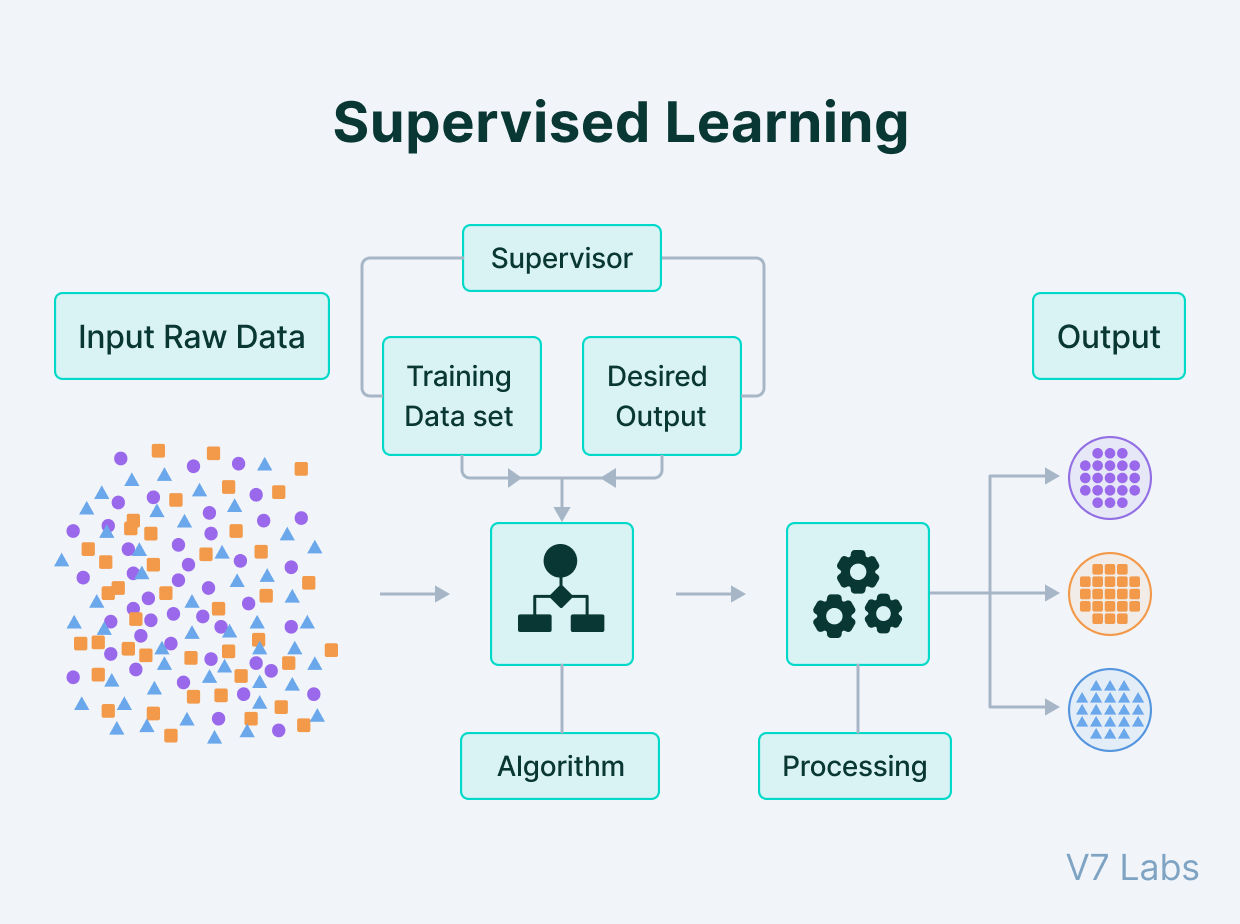

### Unsupervised Learning

Unsupervised Learning is a type of machine learning in which the algorithms are provided with data that does not contain any labels or explicit instructions on what to do with it. The goal is for the learning algorithm to find structure in the input data on its own.

To put it simply—Unsupervised Learning is a kind of self-learning where the algorithm can find previously hidden patterns in the unlabeled datasets and give the required output without any interference.

Identifying these hidden patterns helps in clustering, association, and detection of anomalies and errors in data.

You can learn more about the differences between supervised and unsupervised learning [here](https://www.v7labs.com/blog/supervised-vs-unsupervised-learning).

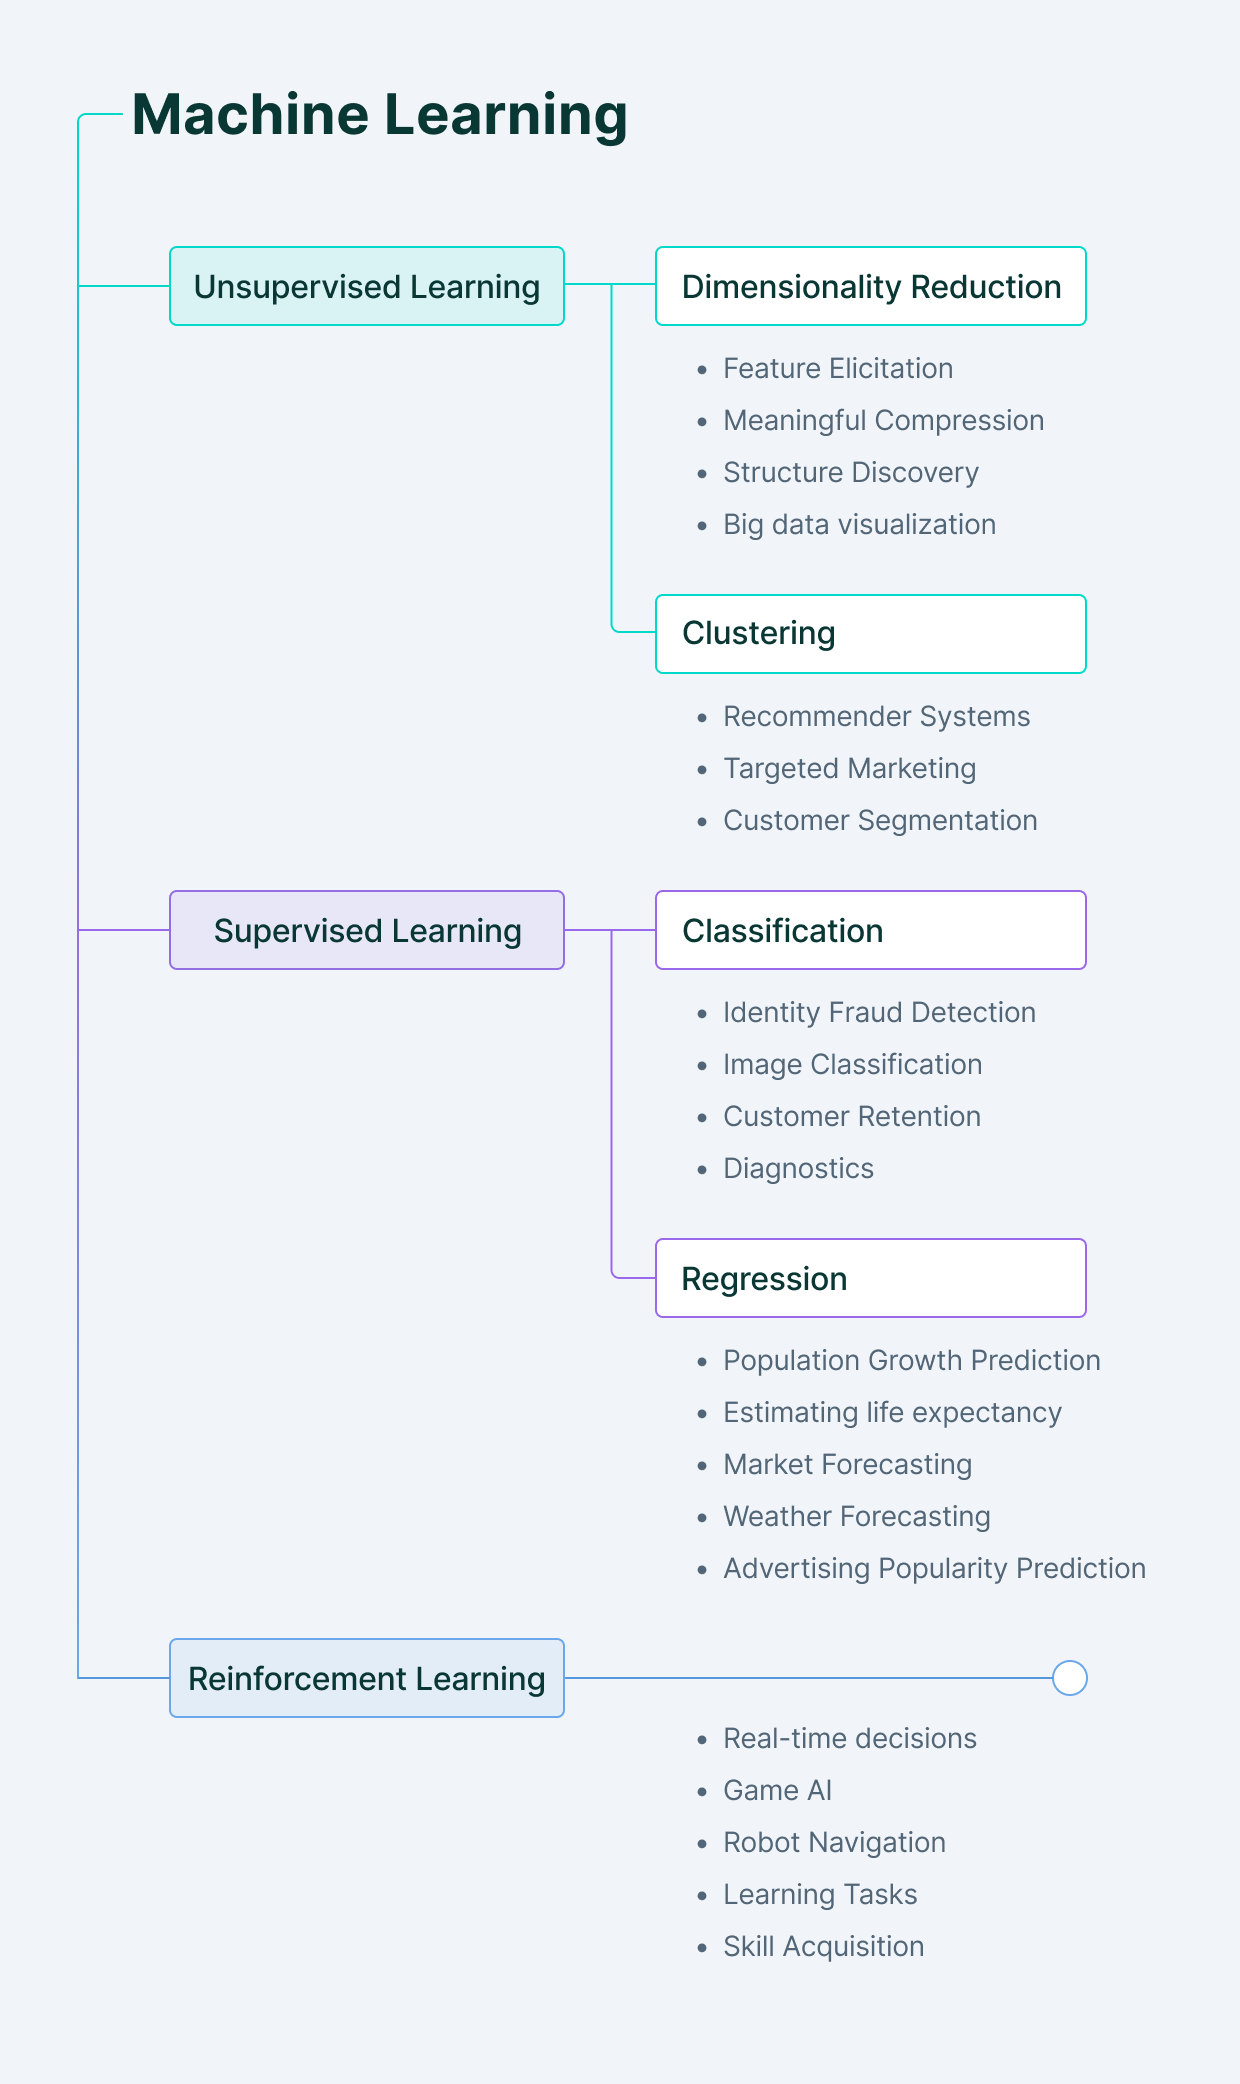



# Linear Regression

Used directly, with an appropriate data set, linear regression can be used to fit the data with any function of the form

\begin{equation}
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n \, .
\end{equation}

For the simplest model with only one independent variable, we'll approximate this equation as

\begin{equation}
  y = \beta_0 + \beta_1 x + \epsilon \, .
\end{equation}

## Least squares linear regression

For least squares linear regression, we'll attempt to find the values of $\beta_0$ and $\beta_1$ that minimize the square of the residual between our $y$ values and our mathematical model $\beta_0 + \beta_1 x$. In math, this looks like
\begin{equation}
\underset{\beta_0, \beta_1}{\operatorname{min}}   \sum_{i=1}^n \left\lbrack y_i - (\beta_0 + \beta_1 x_i) \right\rbrack^2.
\end{equation}
To find the minimum, we take the derivative with respect to both $\beta$ variables and set the resulting equations equal to zero. The you can solve the resulting system of equations with two equations and two unknowns. Sparing you some math, the resulting equations are
\begin{equation}
\beta_1 =
\frac{\sum_{i=1}^n {(x_i - \overline{x}) (y_i - \overline{y})}}{\sum_{i=1}^n {(x_i - \overline{x})^2 }} \, ,
\end{equation}
\begin{equation}
\beta_0 = \overline{y} - \beta_1 \overline{x} \, ,
\end{equation}

where the overline quantities denote the mean values.

First, let's import a few libraries we'll be using throughout the lesson. The main package we'll be working with is
*   [scikit-learn](https://scikit-learn.org/): an open-source machine learning package

Some other new packages we'll use are
*   [pandas](https://pandas.pydata.org/): for a clean interface to work with large datasets
*   [seaborn](https://seaborn.pydata.org/): a statistical data visualization package built on top of matplotlib

We'll also use some classics, like [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/).

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline

## Iris dataset

Our first dataset is an absolute banger classic. The iris dataset records the sepal and petal length/width for three different classes of iris flower (Setosa, Versicolour, and Virginica)

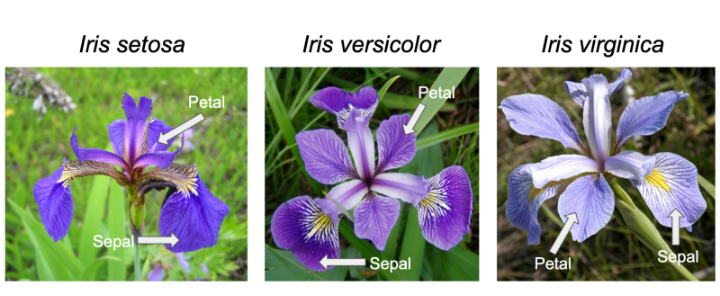

Let's load up the dataset from scikitlearn and load it into a pandas dataframe (a fance python way for working with tables).

In [117]:
from sklearn import datasets

iris_data, iris_classes = sklearn.datasets.load_iris(return_X_y=True,as_frame=True)
iris_df = pd.DataFrame(iris_data)
iris_df['class'] = iris_classes

iris_dictionary = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df.replace({'class': iris_dictionary}, inplace=True)

display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [118]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's take a look at the petal length vs. the petal width. Since there is a seemingly strong positive correlation between these measurements, they'd be good candidates to train a linear regression model.

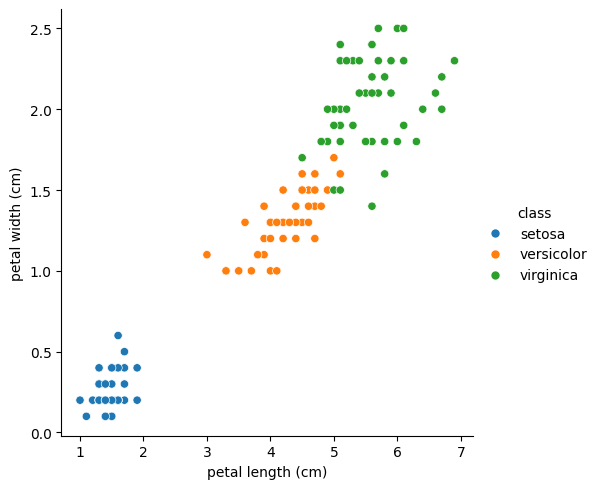

In [119]:
sns.relplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='class')

### Splitting your data

Split the data set into two pieces — a training set and a testing set. This consists of random sampling without replacement about 75 percent of the rows (you can vary this) and putting them into your training set. The remaining 25 percent is put into your test set. The `train_test_split` function from `sklearn.model_selection` will automatically split your test data into (`X_train`, `X_test`, `y_train`, `y_test`) for a particular train test split.

In [120]:
from sklearn.model_selection import train_test_split

X = iris_df['petal length (cm)'].to_numpy().reshape(-1, 1) # X data has to be a matrix
y = iris_df['petal width (cm)'].to_numpy()

print('X shape: ', np.shape(X), 'y shape:', np.shape(y))

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

print('X_train shape: ', np.shape(X_train), 'y_train shape:', np.shape(y_train))
print('X_test shape: ', np.shape(X_test), 'y_test shape:', np.shape(y_test))

X shape:  (150, 1) y shape: (150,)
X_train shape:  (100, 1) y_train shape: (100,)
X_test shape:  (50, 1) y_test shape: (50,)


Next, we'll create our first machine learning model with scikit-learn! Then we'll train our model with the `fit` command. Finally, we'll use our model to generate predictions of what the petal width will be given some arbitrary petal length.

In [121]:
from sklearn.linear_model import LinearRegression

# instantiate model with default settings
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

# generate predictions
y_pred = lr.predict(X_test)

Finally, we'll look at some metrics to see how good of a job our model did in predicting the petal widths from the testing set partition of our original data.

Mean Absolute Error: 0.15345018181676118
Mean Squared Error: 0.03980665015565908
Mean Root Squared Error: 0.19951603984557
R2 Score: 0.922653869466869


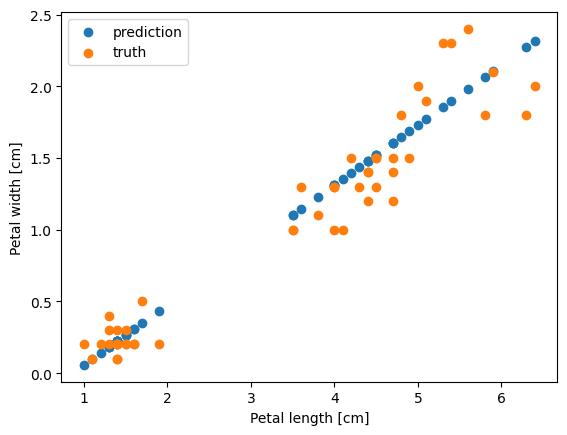

In [122]:
import sklearn.metrics

# evaluate model performance
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('Mean Root Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', sklearn.metrics.r2_score(y_test, y_pred))

plt.scatter(X_test, y_pred, label='prediction')
plt.scatter(X_test, y_test, label='truth')
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend()
plt.show()

We could now interpolate (or extrapolate) petal width's given any desired petal length. For example:

[0.68540944 2.98847498]


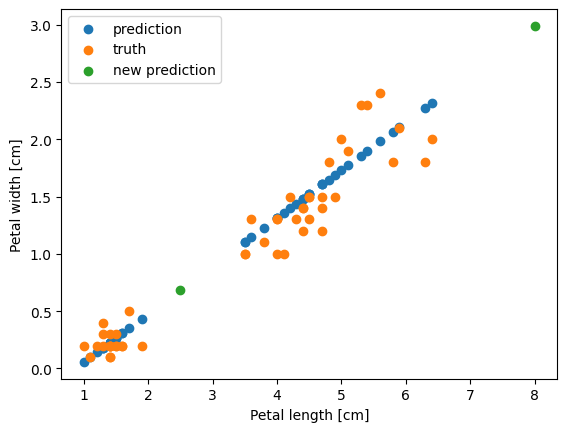

In [123]:
petal_length_interp = [[2.5], [8.0]]

petal_width_pred = lr.predict(petal_length_interp)
print(petal_width_pred)

plt.scatter(X_test, y_pred, label='prediction')
plt.scatter(X_test, y_test, label='truth')
plt.scatter(petal_length_interp, petal_width_pred, label='new prediction')
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend()
plt.show()

## Diabetes dataset

Let's take a look at another canonical dataset offered from scikitlearn. The diabetes dataset has the following health metrics in it:

*   age
*   sex
*   bmi, body mass index
*   bp, average blood pressure
*   s1 tc, total serum cholesterol
*   s2 ldl, low-density lipoproteins
*   s3 hdl, high-density lipoproteins
*   s4 tch, total cholesterol / HDL
*   s5 ltg, possibly log of serum triglycerides level
*   s6 glu, blood sugar level

Each of these metrics is normalized and centered. It makes the data a little bit confusing to comprehend, but we're mostly concerned with the trends, not the values themselves.

Let's load in the dataset into a pandas dataframe and learn a bit about it.

In [124]:
diabetes_data, diabetes_metric = sklearn.datasets.load_diabetes(return_X_y=True,as_frame=True)
diabetes_df = pd.DataFrame(diabetes_data)

display(diabetes_df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Let's take a look at some of the data. Here we're plotting BMI vs. the diabetes metric.

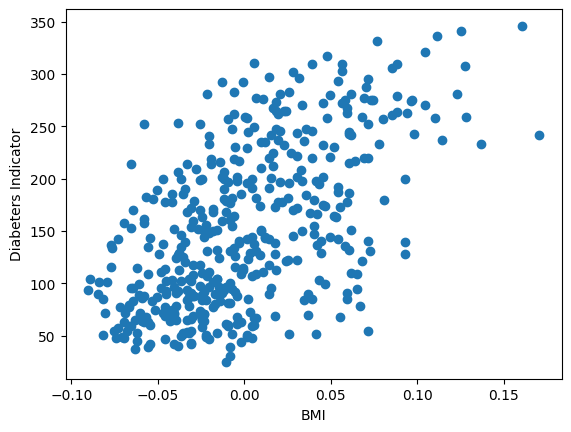

In [125]:
plt.scatter(diabetes_df['bmi'],diabetes_metric)
plt.xlabel('BMI')
plt.ylabel('Diabeters Indicator')
plt.show()

### Problem 1

Which of these health metrics is the strongest indicator of diabetes progression? To figure this out, we'll create a linear regression model for each of the metrics from bmi to s6 (columns 2 through 9).

You'll need to fill in the following function:

In [126]:
def diabetes_linear_regression(parameter_index):
  X = diabetes_data.to_numpy()[:,parameter_index].reshape(-1, 1)
  y = diabetes_metric.to_numpy()

  # split the dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

  # instantiate the model
  lr = LinearRegression()

  # train the model
  lr.fit(X_train, y_train)

  # generate predictions
  y_pred = lr.predict(X_test)
  return X_test, y_test, y_pred

Now let's loop over the health metrics and see which metric has the strongest $R^2$ value when predicting the diabetes progression metric.

Mean Absolute Error: 49.56713400266009
Mean Squared Error: 3782.641219267555
Mean Root Squared Error: 61.50318056220796
R2 Score: 0.30081124942010784


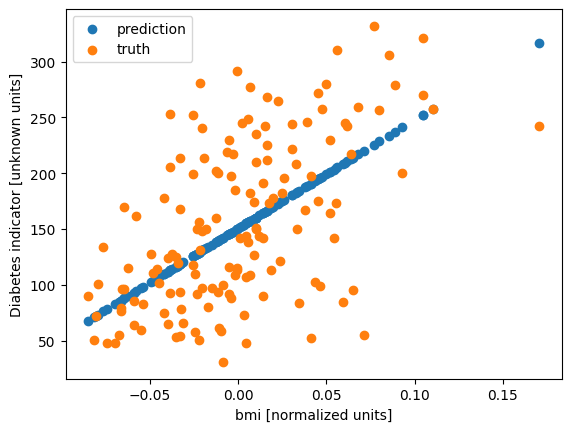

Mean Absolute Error: 59.21121334715593
Mean Squared Error: 5022.315513125327
Mean Root Squared Error: 70.86829695375307
R2 Score: 0.19392593565512262


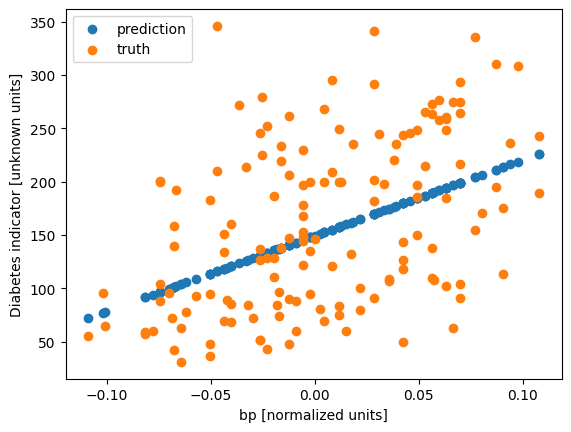

Mean Absolute Error: 65.11493050446593
Mean Squared Error: 5916.04291846414
Mean Root Squared Error: 76.91581708897162
R2 Score: 0.04658478140868605


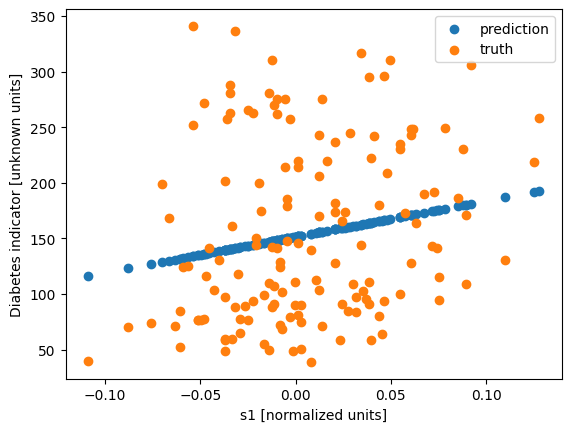

Mean Absolute Error: 66.91744311239266
Mean Squared Error: 6380.036012709888
Mean Root Squared Error: 79.87512762249516
R2 Score: 0.020766315016726655


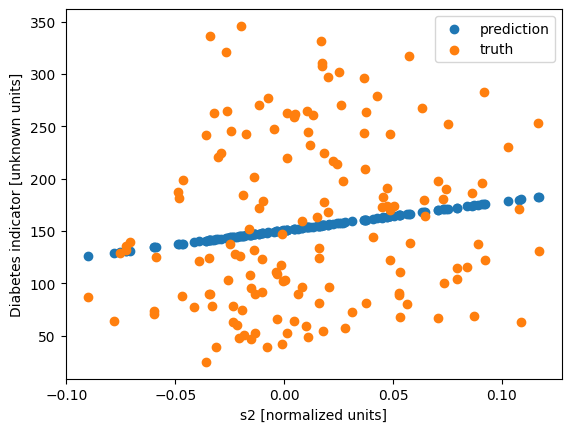

Mean Absolute Error: 58.60495795513324
Mean Squared Error: 4778.7750499438225
Mean Root Squared Error: 69.12868471151337
R2 Score: 0.21078812585511042


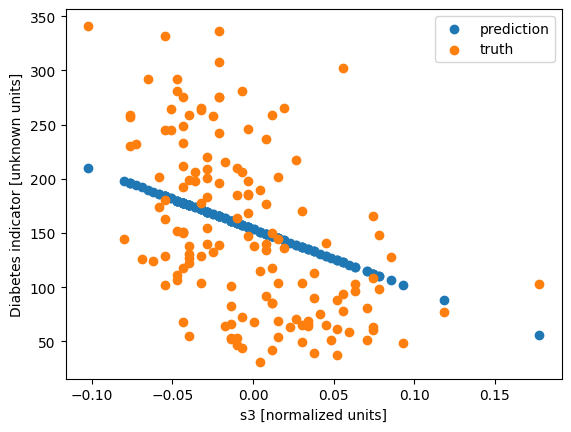

Mean Absolute Error: 56.02399667149632
Mean Squared Error: 4665.344357988619
Mean Root Squared Error: 68.30332611219323
R2 Score: 0.21923849109043514


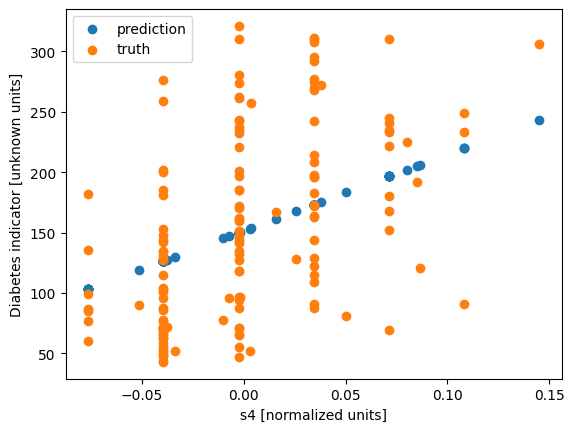

Mean Absolute Error: 50.711443916418744
Mean Squared Error: 3918.630764570242
Mean Root Squared Error: 62.598967759622376
R2 Score: 0.3789772600351956


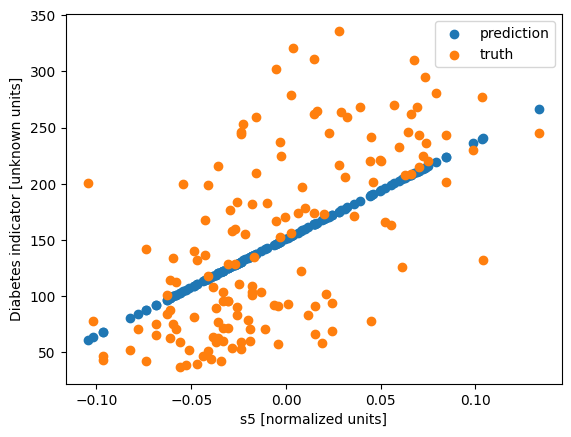

In [127]:
for i in range(2,9):
  X_test, y_test, y_pred = diabetes_linear_regression(i)

  # Evaluating Model's Performance
  print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))
  print('Mean Root Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
  print('R2 Score:', sklearn.metrics.r2_score(y_test, y_pred))

  plt.scatter(X_test, y_pred, label='prediction')
  plt.scatter(X_test, y_test, label='truth')
  plt.xlabel(diabetes_df.columns.tolist()[i] + ' [normalized units]')
  plt.ylabel('Diabetes indicator [unknown units]')
  plt.legend()
  plt.show()

## Beyond straight lines

Linear regression can be extended for more than just straight lines. Linear regression can be used to generate parabolas, higher-order polynomials, and logarithmic functions as well. Even "circles of best fit" can be generated or higher dimensional fits (planes, hyper-planes, etc.). Unfortunately, we only have time for straight lines today.

# Logistic Regression

Recall the regression equation

\begin{equation}
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
\end{equation}

## Sigmoid Function

\begin{equation}
  p = \frac{1}{1+e^{-y}}
\end{equation}

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0.

Substitute the sigmoid equation into the linear regression equation:

\begin{equation}
  p = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}
\end{equation}

If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. For example: Let's say we have a logistic regression model that predicts cancer and we feed in the patient's data to the model. If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that a patient will suffer from cancer.

## Linear vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a discrete output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

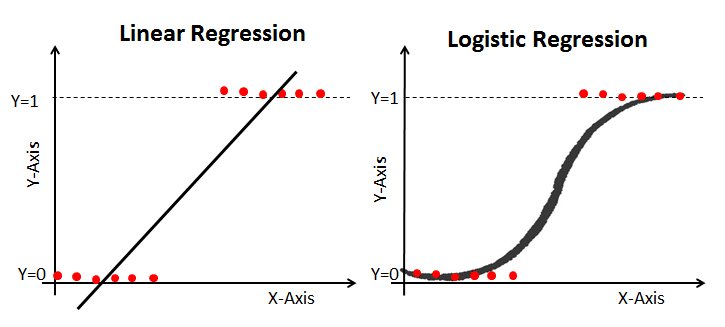

## Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Wine dataset

The data comes from UCI (https://archive.ics.uci.edu/dataset/109/wine) where several measurements are taken for a variety of wine "classes". The classes are unspecified types of wine, for example: Chardonay, Merlot, etc.

The specific measurements include:

*   alcohol
*   malic acid
*   ash
*   alcalinity
*   magnesium
*   total_phenols
*   flavanoids
*   nonflavanoid_phenols
*   proanthocyanins
*   color
*   hue
*   od
*   proline

Let's take a look at our data:

In [128]:
wine_X, wine_y = sklearn.datasets.load_wine(return_X_y=True, as_frame=True)

wine_df = pd.DataFrame(wine_X)
wine_df = pd.concat([wine_df, wine_y.rename('class')], axis= 1)

# now lets only do the first two classes
wine_df_reduced = wine_df[wine_df['class'] < 2]

display(wine_df_reduced)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


We want to focus in on two specific variables here to train our logistic regression model: alcohol and ash content. Let's set our $X$ matrix to be these two variables and our $y$ to be the class of wine.

In [129]:
wine_X_reduced = wine_df_reduced[['alcohol', 'ash']].to_numpy()
wine_y_reduced = wine_df_reduced['class'].to_numpy()

Let's split our data into training and testing sets.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(wine_X_reduced, wine_y_reduced, test_size=0.25)
print('train:', len(X_train), 'test:', len(X_test))

train: 97 test: 33


Now let's take a look at our data, colored by class to see if we can draw a mental line on where to separate the data

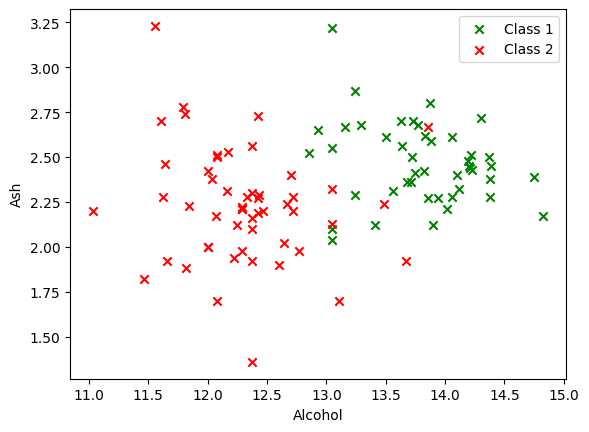

In [131]:
class_1_x_train = np.array([X for i, X in enumerate(X_train) if y_train[i] == 0])
class_2_x_train = np.array([X for i, X in enumerate(X_train) if y_train[i] == 1])

plt.scatter(class_1_x_train[:,0], class_1_x_train[:,1], color='green', marker='x', label='Class 1')
plt.scatter(class_2_x_train[:,0], class_2_x_train[:,1], color='red', marker='x',label='Class 2')
plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.legend()
plt.show()

Finally, let's create and train our linear regression model. Let's set `random_state=0` so we all get the same result.

In [132]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

Now, we'll plot the decision line that our logistic regression model generatee to see how well our model can classify the training data.

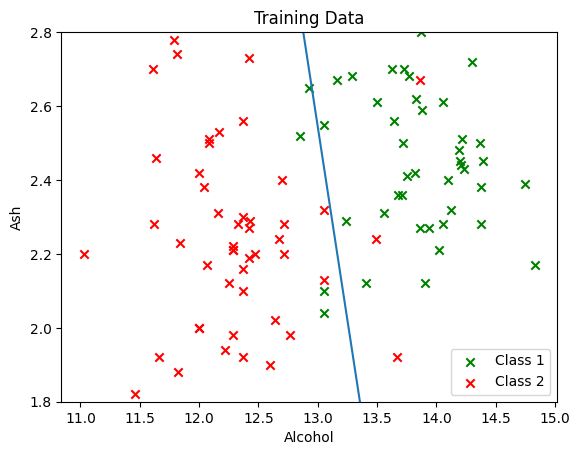

In [133]:
intercept = clf.intercept_
slope = clf.coef_.T
decision_line_x = np.linspace(min(X_test[:,0]), max(X_test[:,0]),100)
decision_line_y = (slope[0]*decision_line_x+intercept)/(-slope[1])

plt.scatter(class_1_x_train[:,0], class_1_x_train[:,1], color='green', marker='x', label='Class 1')
plt.scatter(class_2_x_train[:,0], class_2_x_train[:,1], color='red', marker='x', label='Class 2')
plt.plot(decision_line_x, decision_line_y)
plt.ylim(1.8,2.8)
plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.title('Training Data')
plt.legend()
plt.show()

Now lets do the same thing with our test data and see how well our model predicted the class of wine.

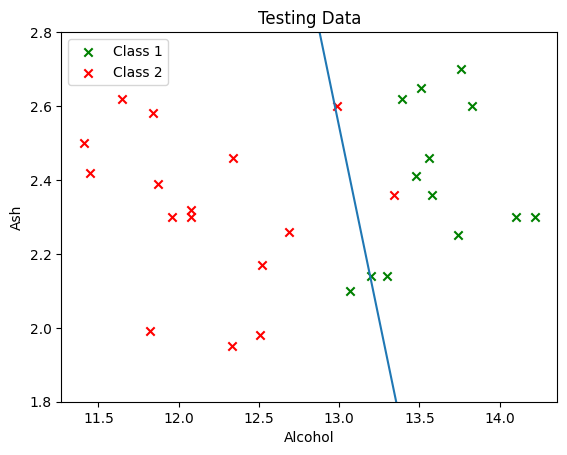

In [134]:
class_1_x_test = np.array([[X[0], X[1]] for i, X in enumerate(X_test) if y_test[i] == 0])
class_2_x_test = np.array([[X[0], X[1]] for i, X in enumerate(X_test) if y_test[i] == 1])

plt.scatter(class_1_x_test[:,0], class_1_x_test[:,1], color='green', marker='x', label='Class 1')
plt.scatter(class_2_x_test[:,0], class_2_x_test[:,1], color='red', marker='x', label='Class 2')
plt.plot(decision_line_x, decision_line_y)
plt.ylim(1.8,2.8)
plt.xlabel('Alcohol')
plt.ylabel('Ash')
plt.legend()
plt.title('Testing Data')
plt.show()

Finally, lets used our trained model to make a prediction for the class of wine for each sample. Then we'll compare this to the "ground truth" labels. Then we'll look at our confusion matrix to see how well we did.

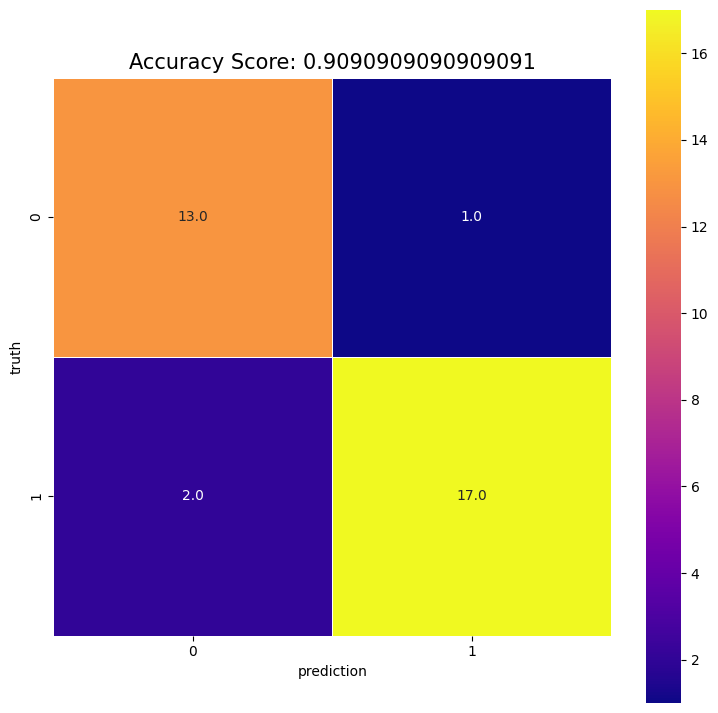

In [135]:
from sklearn import metrics

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('truth');
plt.xlabel('prediction');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Digits datasest

Now let's try training a model using higher-dimensional data. The digits dataset contains training datapoints for classifying digits using your favorite classification algorithm. The datapoints crude are 8x8 pixel arrays.

In [136]:
n_digits = 5
digits = sklearn.datasets.load_digits(n_class=n_digits)

# Print to show there are 901 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 901 labels (integers from 0–4)
print("Label Data Shape", digits.target.shape)

Image Data Shape (901, 64)
Label Data Shape (901,)


Let's take a look at some of the training data.

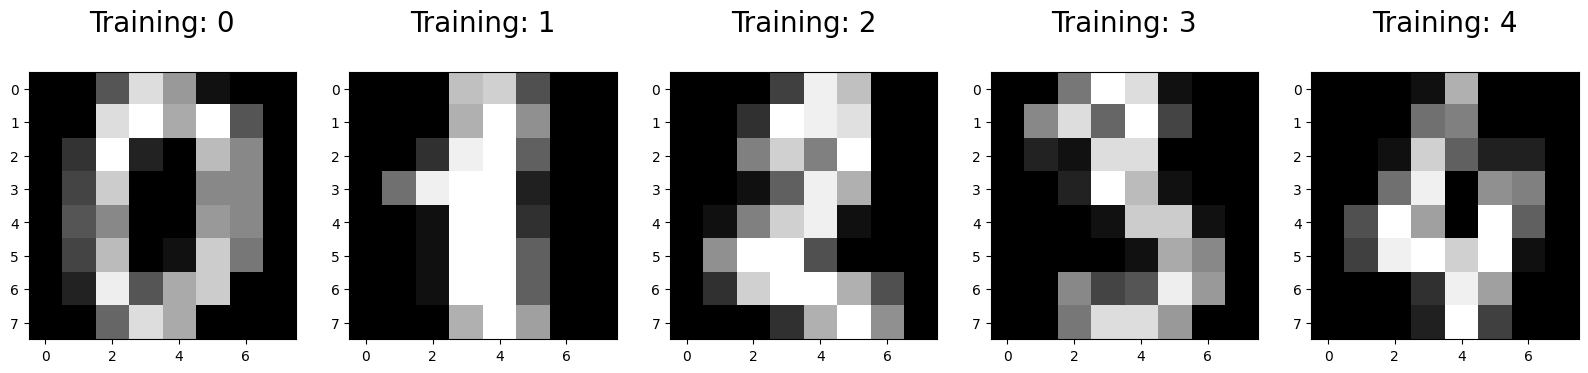

In [137]:
plt.figure(figsize=(4*n_digits,4))

for index, (image, label) in enumerate(zip(digits.data[0:n_digits], digits.target[0:n_digits])):
  plt.subplot(1, n_digits, index + 1)
  # We'll reshape the data to be an 8x8 grid of pixels and plot in grayscale
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

plt.show()

### Problem 2

Now it's your turn to try training a logistic regression model! Here's what we have to do:


1.   Split the data into a training set and a testing set. Remember that our $X$ matrix is accessed by calling `digits.data`. Our $y$ vector is accessed by calling `digits.target`. Let's have 25% of the data points be dedicated to testing. Set the `random_state=0` so we all get the same answer.
2.   Create a `LogisticRegression` object and fit the training data. *Tip: Set the solver to* `'newton-cholesky'` *to avoid a warning about max_iter being reached*
3.   Use the logistic regression model to generate predictions for the testing data
4.   Score how well your logistic regression model did on the testing data
5.   Generate a confusion matrix to visualize how well your model did.

In [138]:
def train_logistic_regression_model(n_digits):
    # split dataset
    xTrain, xTest, yTrain, yTest = train_test_split(digits.data, digits.target, test_size=0.25)
    # instansiate model
    logReg = LogisticRegression(random_state=0)
    # train model
    logReg.fit(xTrain, yTrain)
    # generate predictions
    yPred = logReg.predict(xTest)
    # evaluate performance
    score = logReg.score(xTest, yTest)
    confusion_matrix = metrics.confusion_matrix(yTest, yPred)
    return score, confusion_matrix

Now let's plot the confusion matrix and see how well we did!

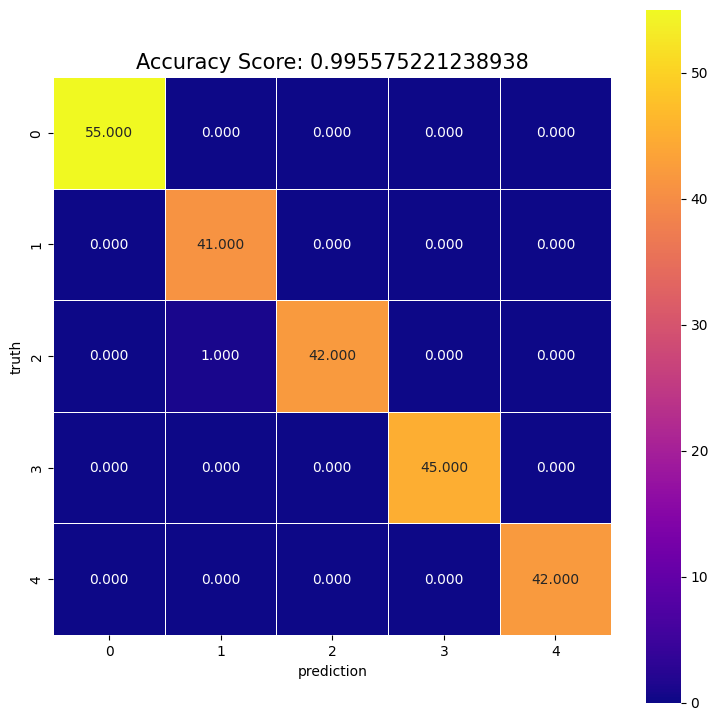

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

n_digits = 8
score, confusion_matrix = train_logistic_regression_model(n_digits)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'plasma');
plt.ylabel('truth');
plt.xlabel('prediction');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# [Provide Feedback Here](https://forms.gle/3NsdcphuBJ7GFPEu5)